In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [18]:
boston_df.head(1000)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### A continuación se describen las variables del conjunto de datos:

- CRIM - tasa de delincuencia per cápita por ciudad

- ZN - proporción de suelo residencial zonificado para lotes de más de 25.000 pies cuadrados.

- INDUS - proporción de acres comerciales no minoristas por localidad.

- CHAS - variable ficticia del río Charles (1 si el tracto linda con el río; 0 en caso contrario)

- NOX - concentración de óxidos nítricos (partes por 10 millones)

- RM - número medio de habitaciones por vivienda

- EDAD - proporción de unidades ocupadas por sus propietarios construidas antes de 1940

- DIS - distancias ponderadas a cinco centros de empleo de Boston

- RAD - índice de accesibilidad a las autopistas radiales

- IMPUESTO - tasa del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares

- PTRATIO - proporción alumnos-profesor por ciudad

- LSTAT - % más bajo de la población

- MEDV - valor medio de las viviendas ocupadas por sus propietarios en miles de dólares

##### Para el "Valor medio de las viviendas ocupadas por sus propietarios" proporcione un diagrama de caja (boxplot)

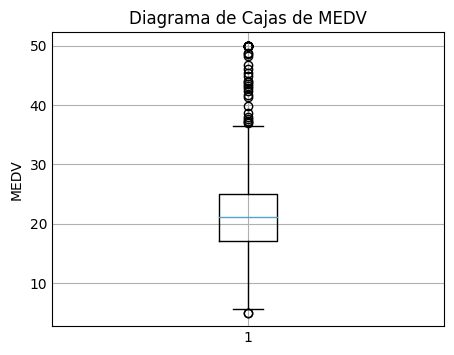

In [21]:
plt.figure(figsize=(4, 3))
plt.boxplot(boston_df['MEDV'])
plt.title('Diagrama de Cajas de MEDV')
plt.ylabel('MEDV')
plt.show()

##### Proporcione un diagrama de barras para la variable "Río Charles"

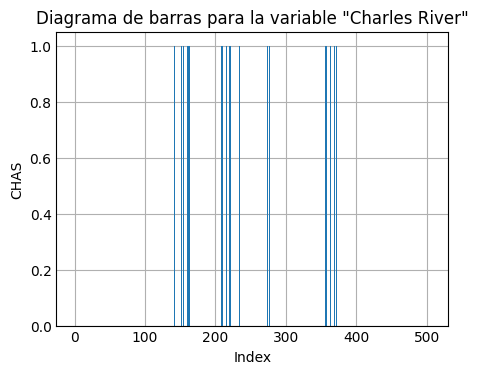

In [25]:
plt.figure(figsize=(4, 3))
plt.bar(x=range(len(boston_df['CHAS'])), height=boston_df['CHAS'])
plt.title('Diagrama de barras para la variable "Charles River"')
plt.xlabel('Index')
plt.ylabel('CHAS')
plt.show()

##### Proporcione un boxplot para la variable MEDV frente a la variable EDAD. (Discretice la variable edad en tres grupos de 35 años o menos, entre 35 y 70 años y 70 años o más)

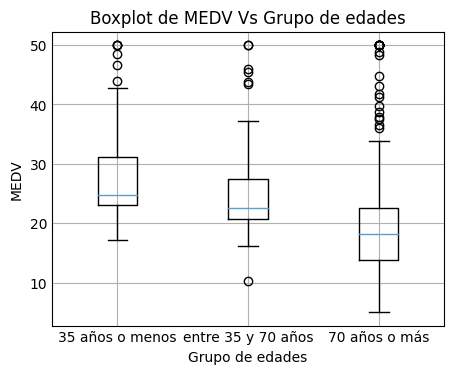

In [30]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 años o menos', 'entre 35 y 70 años', '70 años o más'])

plt.figure(figsize=(4, 3))
plt.boxplot([boston_df[boston_df['AGE_GROUP'] == '35 años o menos']['MEDV'],
             boston_df[boston_df['AGE_GROUP'] == 'entre 35 y 70 años']['MEDV'],
             boston_df[boston_df['AGE_GROUP'] == '70 años o más']['MEDV']],
             labels=['35 años o menos', 'entre 35 y 70 años', '70 años o más'])
plt.title('Boxplot de MEDV Vs Grupo de edades')
plt.xlabel('Grupo de edades')
plt.ylabel('MEDV')
plt.show()


##### Proporcione un diagrama de dispersión para mostrar la relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad. ¿Qué puede decir sobre la relación?

Text(0, 0.5, 'Proporción de acres comerciales')

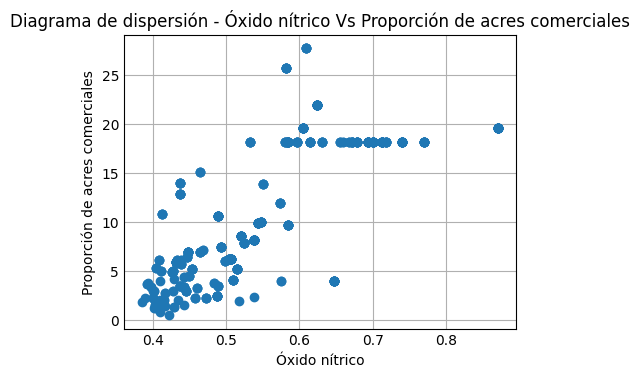

In [33]:
plt.figure(figsize=(4,3))
plt.scatter(boston_df['NOX'],
            boston_df['INDUS'])
plt.title('Diagrama de dispersión - Óxido nítrico Vs Proporción de acres comerciales')
plt.xlabel('Óxido nítrico')
plt.ylabel('Proporción de acres comerciales')

##### Cree un histograma para la variable proporción de alumnos por profesor

Text(0.5, 0, 'Proporción alumnos por profesor')

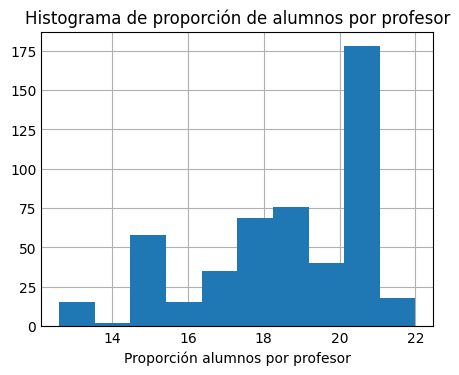

In [35]:
plt.figure(figsize=(4,3))
plt.hist(boston_df['PTRATIO'])
plt.title('Histograma de proporción de alumnos por profesor')
plt.xlabel('Proporción alumnos por profesor')

##### ¿Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles o no? (Prueba T para muestras independientes)

In [36]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg

In [37]:
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,entre 35 y 70 años
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 años o más
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,entre 35 y 70 años
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,entre 35 y 70 años
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,entre 35 y 70 años


In [46]:
from scipy import stats

# Dividir los datos en dos grupos basados en si están delimitados por el río Charles o no
chas_yes = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_no = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Realizar la prueba T para muestras independientes
t_statistic, p_value = stats.ttest_ind(chas_yes, chas_no)

# Interpreta el resultado
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Existe evidencia estadística para rechazar la hipótesis nula. Hay una diferencia significativa en el valor medio de las casas delimitadas por el río Charles.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No se encuentra una diferencia significativa en el valor medio de las casas delimitadas por el río Charles.")


Existe evidencia estadística para rechazar la hipótesis nula. Hay una diferencia significativa en el valor medio de las casas delimitadas por el río Charles.


##### ¿Existe alguna diferencia en los valores medios de las casas (MEDV) para cada proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE)? (ANOVA)

In [47]:
from scipy import stats

# Dividir los datos en grupos basados en la proporción de unidades ocupadas por sus propietarios construidas antes de 1940
age_groups = []
for group in set(boston_df['AGE']):
    age_groups.append(boston_df[boston_df['AGE'] == group]['MEDV'])

# Realizar el análisis de varianza (ANOVA)
f_statistic, p_value = stats.f_oneway(*age_groups)

# Interpreta el resultado
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Existe evidencia estadística para rechazar la hipótesis nula. Hay al menos una diferencia significativa en los valores medios de las casas para las diferentes proporciones de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE).")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No se encuentra una diferencia significativa en los valores medios de las casas para las diferentes proporciones de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE).")



No hay suficiente evidencia para rechazar la hipótesis nula. No se encuentra una diferencia significativa en los valores medios de las casas para las diferentes proporciones de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE).


##### ¿Podemos concluir que no existe relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad? (Correlación de Pearson)

In [48]:
import pandas as pd

# Calcular la correlación de Pearson
correlation = boston_df['NOX'].corr(boston_df['INDUS'], method='pearson')

# Interpretar el resultado
if correlation == 0:
    print("No hay correlación lineal entre las concentraciones de óxido nítrico y la proporción de acres no minoristas por ciudad.")
elif correlation > 0 and correlation < 0.5:
    print("Existe una correlación lineal positiva débil entre las concentraciones de óxido nítrico y la proporción de acres no minoristas por ciudad.")
elif correlation < 0 and correlation > -0.5:
    print("Existe una correlación lineal negativa débil entre las concentraciones de óxido nítrico y la proporción de acres no minoristas por ciudad.")
else:
    print("Existe una correlación lineal significativa entre las concentraciones de óxido nítrico y la proporción de acres no minoristas por ciudad.")

Existe una correlación lineal significativa entre las concentraciones de óxido nítrico y la proporción de acres no minoristas por ciudad.


##### ¿Cuál es el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston sobre el valor medio de las viviendas ocupadas por sus propietarios? (Análisis de regresión)

In [49]:
import statsmodels.api as sm

# Definir las variables independientes y dependiente
X = boston_df['DIS']  # Variable independiente
y = boston_df['MEDV']  # Variable dependiente

# Añadir constante a la variable independiente
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Obtener los resultados del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        15:46:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0